In [1]:
from utils import *

In [2]:
from matplotlib import pyplot as plt

In [3]:
# Get stock prices and price movements
company_symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2022-01-01"

stock_prices = get_stock_prices(company_symbol, start_date, end_date)
price_movements = get_price_movements(stock_prices)

[*********************100%***********************]  1 of 1 completed


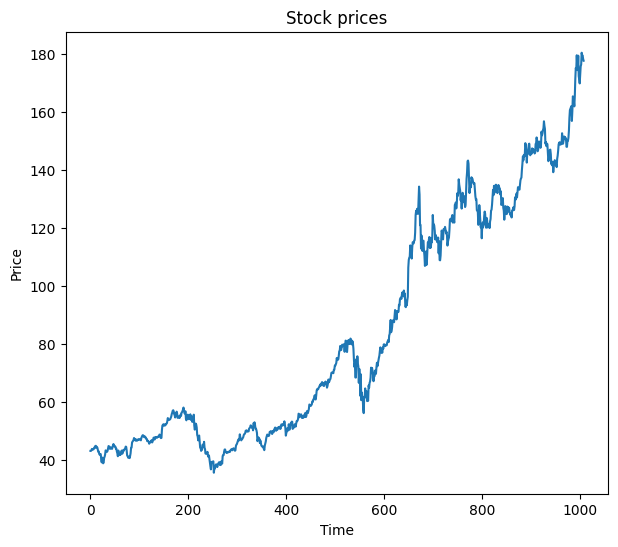

In [4]:
# plot the stock prices and price movements
plt.figure(figsize=(7, 6))
plt.title("Stock prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(stock_prices)

plt.show()

## Applying HMM learning from the data :

In [5]:
# Train HMM model
n_states = 2
iterations = 1000

pi, A, O = baum_welch([price_movements], n_states, iterations=iterations)

100%|██████████| 1000/1000 [00:08<00:00, 119.25it/s]


## Calculating scores for observation sequences :

In [6]:
# Get new observation sequence
obs_sequence = get_price_movements(get_stock_prices(company_symbol, "2022-01-01", "2022-01-31"))

[*********************100%***********************]  1 of 1 completed


In [7]:
# Calculate sequence probability
alpha, seq_probability = forward(pi, A, O, obs_sequence)
print(f"Probability of the given sequence of observations: {seq_probability}")

Probability of the given sequence of observations: 2.8377093759589575e-06


## Decoding observation sequences : 

In [8]:
# Predict the most likely hidden states
delta, psi = viterbi(n_states, pi, A, O, obs_sequence)

# The most probable state sequence.
state_sequence = np.zeros(len(obs_sequence), dtype=np.int32)
state_sequence[-1] = np.argmax(delta[:, -1])
for t in range(len(obs_sequence) - 2, -1, -1):
    state_sequence[t] = psi[int(state_sequence[t+1]), t+1]

print(f"Most likely states: {state_sequence}")

Most likely states: [0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1]


## Prediction

In [9]:
# get next month's stock prices
next_month_prices = get_stock_prices(company_symbol, "2022-02-01", "2022-02-28")
next_month_movements = get_price_movements(next_month_prices)

[*********************100%***********************]  1 of 1 completed


In [10]:
# Get current state as the last state from the training data
current_state = state_sequence[-1]

# predict as much steps as there are observations in the future
n_steps = len(next_month_prices)

In [11]:
# Generate future states and observations
future_states = generate_future_states(n_states, A, current_state, n_steps)
future_observations = generate_future_observations(future_states, O)

In [12]:
accuracy = get_accuracy(next_month_movements, future_observations)
print(f"Accuracy of the prediction: {accuracy * 100:.2f}%")

Accuracy of the prediction: 52.94%
